## Load data

In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras

Using Theano backend.


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
#datapath = '/media/sf_vmshared/timeseries/eecology/'
datapath = '/media/sf_VBox_Shared/timeseries/eecology/'
outputpath ='/media/sf_VBox_Shared/timeseries/results/eecology_models.json'

In [4]:
from keras.utils.np_utils import to_categorical

In [5]:
ext = '.npz'
X_train = np.load(datapath+'X_train'+ext)['arr_0']
y_train_binary = to_categorical(np.load(datapath+'y_train'+ext)['arr_0'])
X_val = np.load(datapath+'X_val'+ext)['arr_0']
y_val_binary = to_categorical(np.load(datapath+'y_val'+ext)['arr_0'])
X_test = np.load(datapath+'X_test'+ext)['arr_0']
y_test_binary = to_categorical(np.load(datapath+'y_test'+ext)['arr_0'])

In [6]:
num_classes = y_train_binary.shape[1]
print(num_classes)

11


## Generate models

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam

In [8]:
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))

from mcfly import modelgen, find_architecture

In [9]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 10,
                                  #model_type = 'CNN',
                                  #cnn_max_layers=4,
                                  #deepconvlstm_max_conv_layers=3,
                                  #deepconvlstm_max_lstm_layers=2
                                 )

CPU times: user 8.38 s, sys: 188 ms, total: 8.56 s
Wall time: 20.2 s


In [10]:
for model, params, model_types in models:
    print(params)
    model.summary()

{'lstm_dims': array([45, 85]), 'regularization_rate': 0.012238061776237413, 'filters': array([17, 90, 77, 20, 80]), 'learning_rate': 0.004442423175188501}
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
batchnormalization_1 (BatchNormaliz(None, 20, 3)       6           batchnormalization_input_1[0][0] 
____________________________________________________________________________________________________
reshape_1 (Reshape)                (None, 1, 20, 3)    0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)    (None, 17, 20, 3)   68          reshape_1[0][0]                  
____________________________________________________________________________________________________
batchnormalization_2 (BatchNormaliz(N

## Compare models

In [16]:
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models,nr_epochs=15,
                                                                                  subset_size=1000,
                                                                                  verbose=True,
                                                                                 outputfile=outputpath)

Training model 0 DeepConvLSTM
Train on 1000 samples, validate on 177 samples
Epoch 1/15
1000/1000 [==============================] - 10s - loss: 0.9485 - acc: 0.7820 - val_loss: 0.5779 - val_acc: 0.8418
Epoch 2/15
1000/1000 [==============================] - 8s - loss: 0.8017 - acc: 0.8140 - val_loss: 0.5914 - val_acc: 0.8531
Epoch 3/15
1000/1000 [==============================] - 9s - loss: 0.7797 - acc: 0.8120 - val_loss: 0.5340 - val_acc: 0.8023
Epoch 4/15
1000/1000 [==============================] - 9s - loss: 0.8493 - acc: 0.8110 - val_loss: 1.2681 - val_acc: 0.6384
Epoch 5/15
1000/1000 [==============================] - 9s - loss: 0.9731 - acc: 0.8000 - val_loss: 0.3993 - val_acc: 0.8983
Epoch 6/15
1000/1000 [==============================] - 9s - loss: 0.9006 - acc: 0.7890 - val_loss: 0.6550 - val_acc: 0.8362
Epoch 7/15
1000/1000 [==============================] - 8s - loss: 0.7906 - acc: 0.8220 - val_loss: 0.7905 - val_acc: 0.7514
Epoch 8/15
1000/1000 [=========================

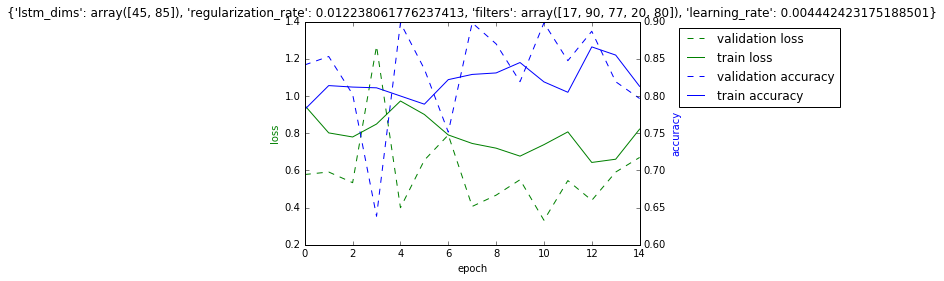

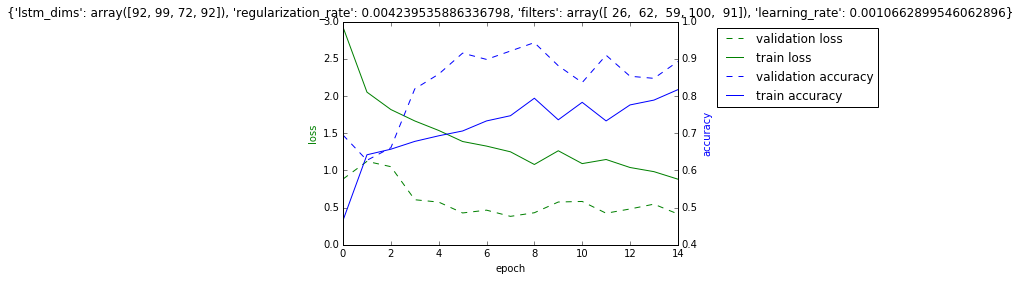

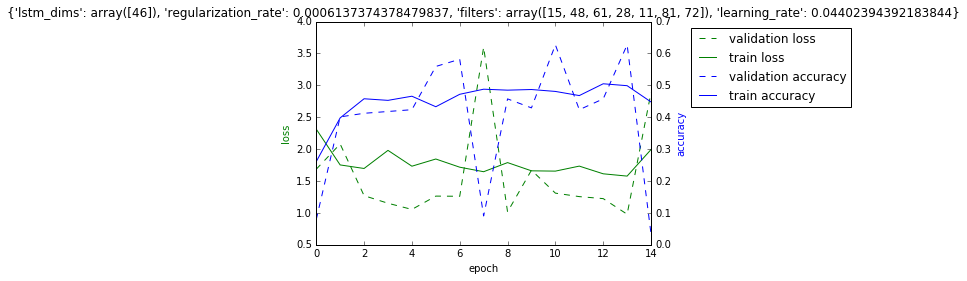

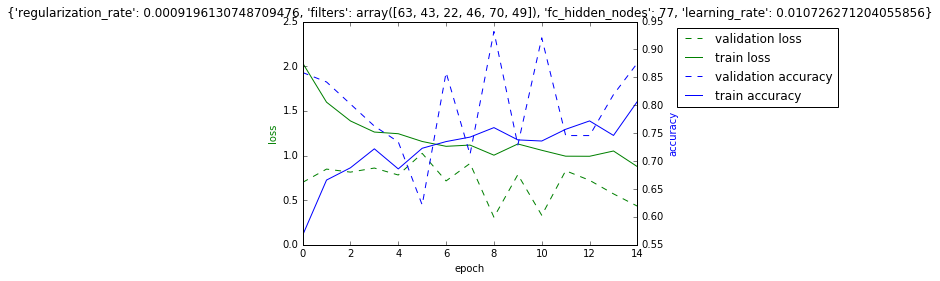

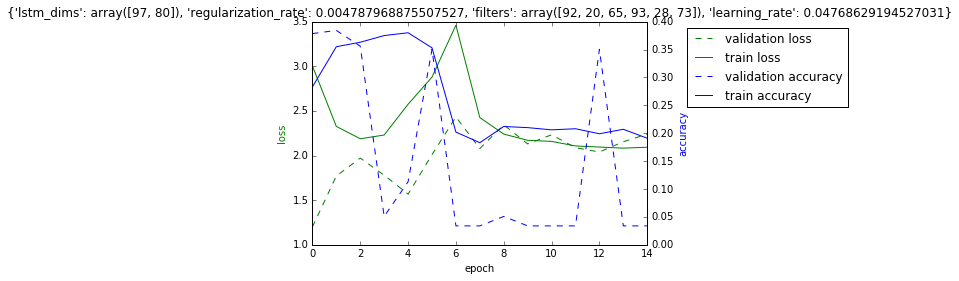

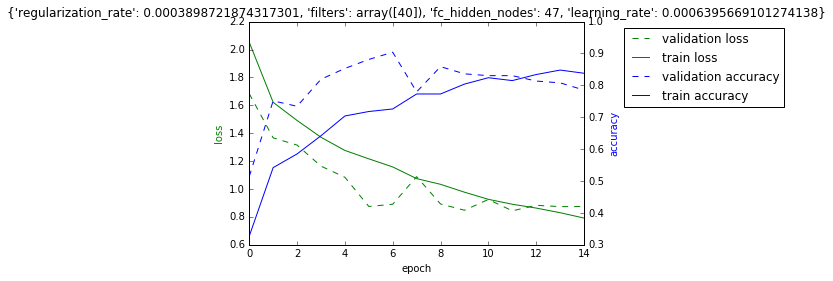

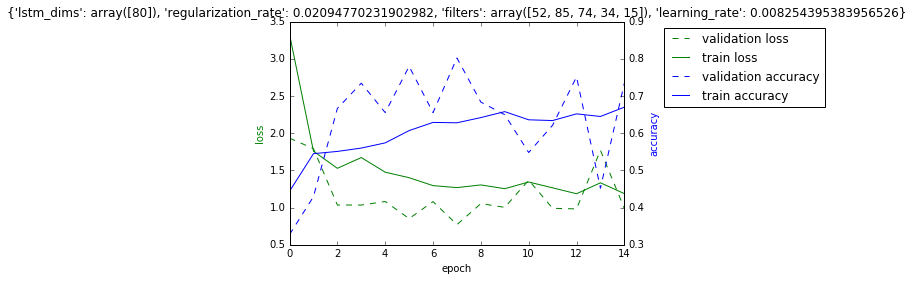

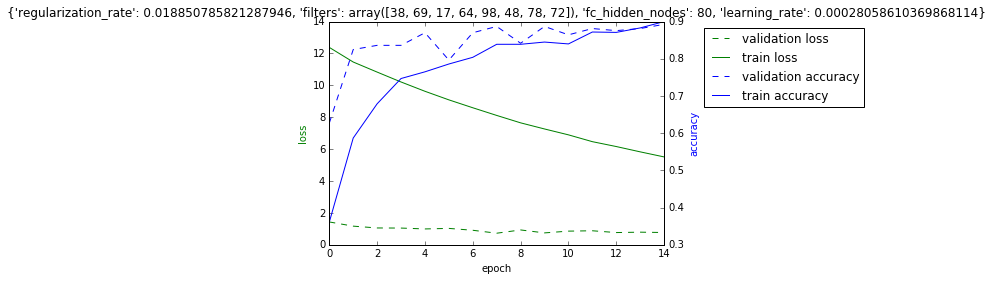

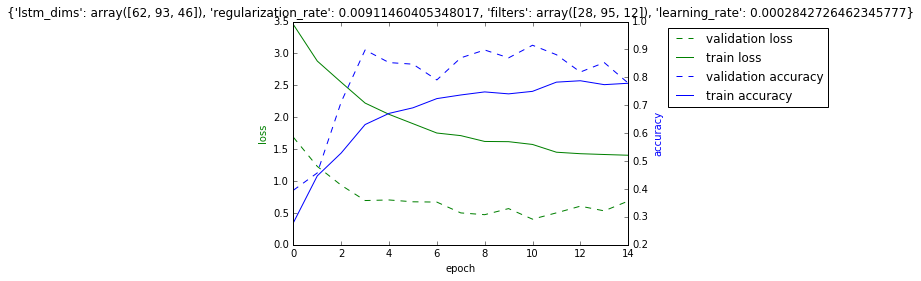

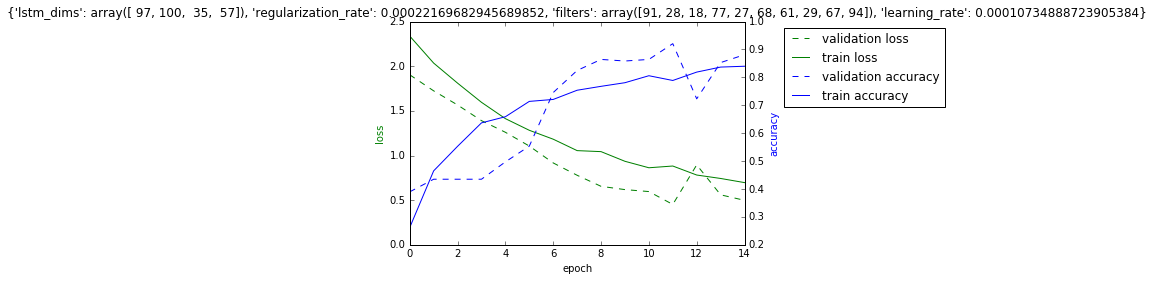

In [17]:
for i in range(len(models)):
    name = str(models[i][1])
    find_architecture.plotTrainingProcess(histories[i], name)

In [18]:
import pandas as pd
results = pd.DataFrame({'model_type':[str(model_type) for model, params, model_type in models],
                'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
results

,model,model_type,train_acc,train_loss,val_acc,val_loss
0,"{'lstm_dims': array([45, 85]), 'regularization...",DeepConvLSTM,0.813,0.821969,0.796610,0.669672
1,"{'lstm_dims': array([92, 99, 72, 92]), 'regula...",DeepConvLSTM,0.817,0.882280,0.892655,0.414298
2,"{'lstm_dims': array([46]), 'regularization_rat...",DeepConvLSTM,0.448,1.993876,0.033898,2.887688
3,"{'regularization_rate': 0.0009196130748709476,...",CNN,0.807,0.875105,0.875706,0.432695
4,"{'lstm_dims': array([97, 80]), 'regularization...",DeepConvLSTM,0.191,2.092914,0.033898,2.239815
5,"{'regularization_rate': 0.0003898721874317301,...",CNN,0.838,0.791599,0.785311,0.874324
6,"{'lstm_dims': array([80]), 'regularization_rat...",DeepConvLSTM,0.670,1.188100,0.734463,0.989184
7,"{'regularization_rate': 0.018850785821287946, ...",CNN,0.900,5.512167,0.892655,0.770262
8,"{'lstm_dims': array([62, 93, 46]), 'regulariza...",DeepConvLSTM,0.779,1.404334,0.779661,0.685491
9,"{'lstm_dims': array([ 97, 100, 35, 57]), 're...",DeepConvLSTM,0.840,0.696657,0.881356,0.498064


In [ ]:
results.to_csv(datapath+'results.csv')

## Train the best model for real

In [19]:
best_model_index = np.argmax(val_accuracies)
#best_model_index = 3

In [20]:
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

1 DeepConvLSTM {'lstm_dims': array([92, 99, 72, 92]), 'regularization_rate': 0.004239535886336798, 'filters': array([ 26,  62,  59, 100,  91]), 'learning_rate': 0.0010662899546062896}


We make a copy of the model, to start training from fresh.

In [21]:
best_params

{'filters': array([ 26,  62,  59, 100,  91]),
 'learning_rate': 0.0010662899546062896,
 'lstm_dims': array([92, 99, 72, 92]),
 'regularization_rate': 0.004239535886336798}

In [23]:
#best_model_copy = modelgen.generate_DeepConvLSTM_model(X_train.shape, num_classes, best_params['filters'], 
#                    best_params['lstm_dims'], best_params['learning_rate'], best_params['regularization_rate'])
best_model_copy = best_model

In [24]:
best_model_copy.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
batchnormalization_7 (BatchNormaliz(None, 20, 3)       6           batchnormalization_input_2[0][0] 
____________________________________________________________________________________________________
reshape_3 (Reshape)                (None, 1, 20, 3)    0           batchnormalization_7[0][0]       
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)    (None, 26, 20, 3)   104         reshape_3[0][0]                  
____________________________________________________________________________________________________
batchnormalization_8 (BatchNormaliz(None, 26, 20, 3)   6           convolution2d_6[0][0]            
___________________________________________________________________________________________

We're going to train the model on the complete data set, and save the model after each epoch

In [25]:
nr_epochs = 50
datasize = X_train.shape[0]
history = best_model_copy.fit(X_train[:datasize,:,:], y_train_binary[:datasize,:],
              nb_epoch=nr_epochs, validation_data=(X_val, y_val_binary)
              #, callbacks=[keras.callbacks.ModelCheckpoint(datapath+'weights.{epoch:02d}-{val_loss:.2f}.hdf5')]
            )

Train on 1065 samples, validate on 177 samples
Epoch 1/50
1065/1065 [==============================] - 16s - loss: 0.9044 - acc: 0.8141 - val_loss: 0.3943 - val_acc: 0.9209
Epoch 2/50
1065/1065 [==============================] - 15s - loss: 0.8278 - acc: 0.8329 - val_loss: 0.4857 - val_acc: 0.8644
Epoch 3/50
1065/1065 [==============================] - 17s - loss: 0.7987 - acc: 0.8432 - val_loss: 0.3268 - val_acc: 0.9096
Epoch 4/50
1065/1065 [==============================] - 15s - loss: 0.8366 - acc: 0.8150 - val_loss: 0.4428 - val_acc: 0.9153
Epoch 5/50
1065/1065 [==============================] - 15s - loss: 0.7521 - acc: 0.8545 - val_loss: 0.4584 - val_acc: 0.8927
Epoch 6/50
1065/1065 [==============================] - 15s - loss: 0.7198 - acc: 0.8667 - val_loss: 0.5212 - val_acc: 0.8418
Epoch 7/50
1065/1065 [==============================] - 15s - loss: 0.7131 - acc: 0.8592 - val_loss: 0.5845 - val_acc: 0.8305
Epoch 8/50
1065/1065 [==============================] - 14s - loss: 0.7

If we plot the training process, we see that the model is probably already overfitting in the first epoch. 

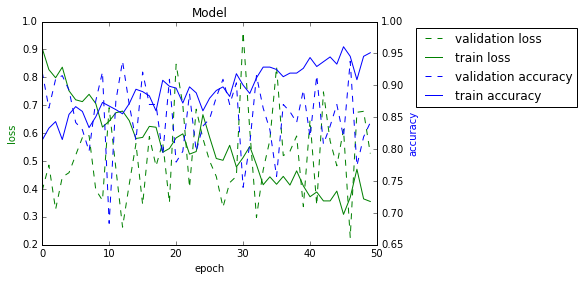

In [26]:
find_architecture.plotTrainingProcess(history)

## Test on test set

In [ ]:
score_test = best_model.evaluate(X_test, y_test_binary, verbose=False)
print('Score of best model: ' + str(score_test))